In [35]:
# Import libraries

# Pandas
import pandas as pd
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.metrics import confusion_matrix


from sklearn.linear_model import LogisticRegression

from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import classification_report
from imblearn.ensemble import EasyEnsembleClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.svm import SVC
import sklearn as skl
import tensorflow as tf

In [5]:
file = 'clean_ml_data_0625.csv'
clean_df = pd.read_csv(file)

In [6]:
clean_df = clean_df.sample(30000)

In [7]:
clean_df.head()

,gender,pneumonia,pregnant,diabetes,copd,asthma,immunosup,hypertension,cardiovascular,obesity,renal_chronic,tobacco,closed_contact,another_complication,death,intubation,ICU,new_age
691822,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,3
1156070,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2
776065,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
843655,1,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,2
314873,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,4


In [8]:
Counter(clean_df.death)

Counter({0: 27038, 1: 2962})

In [9]:
y= clean_df['death']
X = clean_df.drop(columns = ['ICU','intubation','death'])

In [10]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state =42, stratify=y)

In [11]:
# Creating StandardScaler instance
scaler = StandardScaler()
# Fitting standard scaler
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [12]:
# Resample the training data with SMOTE
from imblearn.over_sampling import SMOTE
X_resampled_s, y_resampled_s = SMOTE(random_state=1,
sampling_strategy='auto').fit_resample(X_train_scaled,y_train)
Counter(y_resampled_s)

Counter({1: 20278, 0: 20278})

In [29]:
keep_col = ['gender',
         'pneumonia', 'new_age',
       'pregnant', 'diabetes', 'copd',
       'asthma', 'immunosup', 'hypertension',
       'cardiovascular', 'obesity', 'renal_chronic', 'tobacco', 'another_complication', 'closed_contact']

In [28]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

results = []
clf = DecisionTreeClassifier(random_state=42)

sk_folds = StratifiedKFold(n_splits = 5)

scores = cross_val_score(clf, X_resampled_s, y_resampled_s, cv = sk_folds)
print('Accuracy', np.mean(scores), scores)
balanced_scores = cross_val_score(clf,  X_resampled_s, y_resampled_s, cv = sk_folds, scoring=sc)
print('Balanced Accuracy', np.mean(balanced_scores), balanced_scores)
recall = cross_val_score(clf, X_resampled_s, y_resampled_s, cv = sk_folds, scoring='recall')
print('Recall', np.mean(recall), recall)
precision = cross_val_score(clf, X_resampled_s, y_resampled_s, cv = sk_folds, scoring='precision')
print('Precision', np.mean(precision), precision)
f1 = cross_val_score(clf, X_resampled_s, y_resampled_s, cv = sk_folds, scoring='f1')
print('F1', np.mean(f1), f1)

results.append({
    "name": "Decision Tree",
    "Accuracy":np.mean(scores),
    "Balanced_Accuracy":np.mean(balanced_scores),
    "Recall":np.mean(recall),
    "Precision":np.mean(precision),
    "F1": np.mean(f1)
})
pd.DataFrame(results)

Accuracy 0.8759232680678796 [0.85395764 0.88294314 0.88230922 0.88292864 0.8774777 ]
Balanced Accuracy 0.8759233715976572 [0.85395888 0.88294242 0.88230922 0.88292864 0.8774777 ]
Recall 0.895793420277694 [0.86397423 0.8887788  0.90336967 0.91154609 0.91129832]
Precision 0.8616287684893195 [0.84697595 0.87855044 0.86685687 0.86219827 0.85356231]
F1 0.8782868048346316 [0.85539065 0.88363502 0.88473671 0.88618572 0.88148592]


,name,Accuracy,Balanced_Accuracy,Recall,Precision,F1
0,Decision Tree,0.875923,0.875923,0.895793,0.861629,0.878287


In [34]:
svm = SVC(kernel='linear')

sk_folds = StratifiedKFold(n_splits = 5)

scores = cross_val_score(svm, X_resampled_s, y_resampled_s, cv = sk_folds)
print('Accuracy', np.mean(scores), scores)
balanced_scores = cross_val_score(svm,  X_resampled_s, y_resampled_s, cv = sk_folds, scoring=sc)
print('Balanced Accuracy', np.mean(balanced_scores), balanced_scores)
recall = cross_val_score(svm, X_resampled_s, y_resampled_s, cv = sk_folds, scoring='recall')
print('Recall', np.mean(recall), recall)
precision = cross_val_score(svm, X_resampled_s, y_resampled_s, cv = sk_folds, scoring='precision')
print('Precision', np.mean(precision), precision)
f1 = cross_val_score(svm, X_resampled_s, y_resampled_s, cv = sk_folds, scoring='f1')
print('F1', np.mean(f1), f1)

results.append({
    "name": "Support Vector Machine",
    "Accuracy":np.mean(scores),
    "Balanced_Accuracy":np.mean(balanced_scores),
    "Recall":np.mean(recall),
    "Precision":np.mean(precision),
    "F1": np.mean(f1)
})
pd.DataFrame(results)

Accuracy 0.8295922845756948 [0.82261861 0.83277592 0.83399405 0.83077304 0.8277998 ]
Balanced Accuracy 0.8295923817178709 [0.82260998 0.83278503 0.83399405 0.83077304 0.8277998 ]
Recall 0.7594271938974791 [0.75297324 0.75922715 0.76288404 0.76189296 0.76015857]
Precision 0.8834140450650356 [0.87478411 0.89021202 0.88937031 0.88362069 0.87908309]
F1 0.8167373249611825 [0.80932091 0.81951872 0.82128568 0.81825439 0.81530694]


,name,Accuracy,Balanced_Accuracy,Recall,Precision,F1
0,Decision Tree,0.875923,0.875923,0.895793,0.861629,0.878287
1,Logistic Regression,0.856598,0.856598,0.855458,0.857472,0.856441
2,XGBoost,0.870324,0.870324,0.883158,0.861053,0.871908
3,Random Forest,0.876666,0.876666,0.901888,0.858593,0.879665
4,KNN,0.717782,0.717776,0.483867,0.910326,0.613454
5,Easy Ensemble,0.865839,0.865839,0.857044,0.872428,0.864627
6,Support Vector Machine,0.829592,0.829592,0.759427,0.883414,0.816737


In [29]:
lr = LogisticRegression(max_iter=1000,solver='lbfgs', random_state=1)

sk_folds = StratifiedKFold(n_splits = 5)

scores = cross_val_score(lr, X_resampled_s, y_resampled_s, cv = sk_folds)
print('Accuracy', np.mean(scores), scores)
balanced_scores = cross_val_score(lr,  X_resampled_s, y_resampled_s, cv = sk_folds, scoring=sc)
print('Balanced Accuracy', np.mean(balanced_scores), balanced_scores)
recall = cross_val_score(lr, X_resampled_s, y_resampled_s, cv = sk_folds, scoring='recall')
print('Recall', np.mean(recall), recall)
precision = cross_val_score(lr, X_resampled_s, y_resampled_s, cv = sk_folds, scoring='precision')
print('Precision', np.mean(precision), precision)
f1 = cross_val_score(lr, X_resampled_s, y_resampled_s, cv = sk_folds, scoring='f1')
print('F1', np.mean(f1), f1)

results.append({
    "name": "Logistic Regression",
    "Accuracy":np.mean(scores),
    "Balanced_Accuracy":np.mean(balanced_scores),
    "Recall":np.mean(recall),
    "Precision":np.mean(precision),
    "F1": np.mean(f1)
})
pd.DataFrame(results)

Accuracy 0.8565977980658896 [0.85135637 0.86151369 0.86050545 0.85802775 0.85158573]
Balanced Accuracy 0.8565978892469632 [0.85135585 0.86151467 0.86050545 0.85802775 0.85158573]
Recall 0.8554581960276757 [0.84712587 0.85360416 0.85777998 0.86075322 0.85802775]
Precision 0.8574718085991518 [0.85432284 0.86735464 0.86248132 0.85608674 0.8471135 ]
F1 0.8564414322149538 [0.85070913 0.86042447 0.86012422 0.85841364 0.8525357 ]


,name,Accuracy,Balanced_Accuracy,Recall,Precision,F1
0,Decision Tree,0.875923,0.875923,0.895793,0.861629,0.878287
1,Logistic Regression,0.856598,0.856598,0.855458,0.857472,0.856441


In [30]:
from sklearn.ensemble import GradientBoostingClassifier
xgb = GradientBoostingClassifier(n_estimators=20,
                                        learning_rate=1,
                                        max_features=5,
                                        max_depth=3,
                                        random_state=0)

sk_folds = StratifiedKFold(n_splits = 5)

scores = cross_val_score(xgb,  X_resampled_s, y_resampled_s, cv = sk_folds)
print('Accuracy', np.mean(scores), scores)
balanced_scores = cross_val_score(xgb,  X_resampled_s, y_resampled_s, cv = sk_folds, scoring=sc)
print('Balanced Accuracy', np.mean(balanced_scores), balanced_scores)
recall = cross_val_score(xgb, X_resampled_s, y_resampled_s, cv = sk_folds, scoring='recall')
print('Recall', np.mean(recall), recall)

precision = cross_val_score(xgb, X_resampled_s, y_resampled_s, cv = sk_folds, scoring='precision')
print('Precision', np.mean(precision), precision)

f1 = cross_val_score(xgb, X_resampled_s, y_resampled_s, cv = sk_folds, scoring='f1')
print('F1', np.mean(f1), f1)

results.append({
    "name": "XGBoost",
    "Accuracy":np.mean(scores),
    "Balanced_Accuracy":np.mean(balanced_scores),
    "Recall":np.mean(recall),
    "Precision":np.mean(precision),
    "F1": np.mean(f1)
})
pd.DataFrame(results)

Accuracy 0.8703238946840017 [0.85197572 0.87563483 0.87896432 0.87685828 0.86818632]
Balanced Accuracy 0.8703237803047283 [0.8519758  0.87563419 0.87896432 0.87685828 0.86818632]
Recall 0.8831575395382603 [0.85257681 0.88085212 0.89692765 0.89618434 0.88924678]
Precision 0.8610529092035183 [0.8515219  0.8717823  0.86582157 0.86283397 0.8533048 ]
F1 0.8719082093404825 [0.85204903 0.87629374 0.88110016 0.879193   0.87090512]


,name,Accuracy,Balanced_Accuracy,Recall,Precision,F1
0,Decision Tree,0.875923,0.875923,0.895793,0.861629,0.878287
1,Logistic Regression,0.856598,0.856598,0.855458,0.857472,0.856441
2,XGBoost,0.870324,0.870324,0.883158,0.861053,0.871908


In [31]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 13, random_state = 42)

sk_folds = StratifiedKFold(n_splits = 5)
sc = "balanced_accuracy"

scores = cross_val_score(rf,  X_resampled_s, y_resampled_s, cv = sk_folds)
print('Accuracy', np.mean(scores), scores)

balanced_scores = cross_val_score(rf,  X_resampled_s, y_resampled_s, cv = sk_folds, scoring=sc)
print('Balanced Accuracy', np.mean(balanced_scores), balanced_scores)

recall = cross_val_score(rf, X_resampled_s, y_resampled_s, cv = sk_folds, scoring='recall')
print('Recall', np.mean(recall), recall)

precision = cross_val_score(rf, X_resampled_s, y_resampled_s, cv = sk_folds, scoring='precision')
print('Precision', np.mean(precision), precision)

f1 = cross_val_score(rf, X_resampled_s, y_resampled_s, cv = sk_folds, scoring='f1')
print('F1', np.mean(f1), f1)

results.append({
    "name": "Random Forest",
    "Accuracy":np.mean(scores),
    "Balanced_Accuracy":np.mean(balanced_scores),
    "Recall":np.mean(recall),
    "Precision":np.mean(precision),
    "F1": np.mean(f1)
})
pd.DataFrame(results)

Accuracy 0.876666461649441 [0.85829308 0.88331475 0.88317641 0.88206145 0.87648662]
Balanced Accuracy 0.8766663565193419 [0.85829507 0.88331223 0.88317641 0.88206145 0.87648662]
Recall 0.9018878274867289 [0.87438057 0.90364132 0.90535183 0.91377602 0.9122894 ]
Precision 0.8585933341784319 [0.84709554 0.86836468 0.86690391 0.85927307 0.85132948]
F1 0.8796654468287788 [0.86052182 0.88565186 0.88571082 0.88568684 0.88075589]


,name,Accuracy,Balanced_Accuracy,Recall,Precision,F1
0,Decision Tree,0.875923,0.875923,0.895793,0.861629,0.878287
1,Logistic Regression,0.856598,0.856598,0.855458,0.857472,0.856441
2,XGBoost,0.870324,0.870324,0.883158,0.861053,0.871908
3,Random Forest,0.876666,0.876666,0.901888,0.858593,0.879665


In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=3)

sk_folds = StratifiedKFold(n_splits = 5)

scores = cross_val_score(knn,  X_resampled_s, y_resampled_s, cv = sk_folds)
print('Accuracy', np.mean(scores), scores)

balanced_scores = cross_val_score(knn,  X_resampled_s, y_resampled_s, cv = sk_folds, scoring=sc)
print('Balanced Accuracy', np.mean(balanced_scores), balanced_scores)

recall = cross_val_score(knn, X_resampled_s, y_resampled_s, cv = sk_folds, scoring='recall')
print('Recall', np.mean(recall), recall)

precision = cross_val_score(knn, X_resampled_s, y_resampled_s, cv = sk_folds, scoring='precision')
print('Precision', np.mean(precision), precision)

f1 = cross_val_score(knn, X_resampled_s, y_resampled_s, cv = sk_folds, scoring='f1')
print('F1', np.mean(f1), f1)

results.append({
    "name": "KNN",
    "Accuracy":np.mean(scores),
    "Balanced_Accuracy":np.mean(balanced_scores),
    "Recall":np.mean(recall),
    "Precision":np.mean(precision),
    "F1": np.mean(f1)
})
pd.DataFrame(results)

Accuracy 0.7177815828729346 [0.57859532 0.75671993 0.75371655 0.75730922 0.7425669 ]
Balanced Accuracy 0.7177762780504319 [0.57854505 0.75674368 0.75371655 0.75730922 0.7425669 ]
Recall 0.4838669463066241 [0.17269574 0.56502353 0.55946482 0.57556987 0.54658077]
Precision 0.9103263651296769 [0.91710526 0.9164323  0.91491086 0.9042429  0.89894051]
F1 0.6134544780450167 [0.29065888 0.69904995 0.69434194 0.70340651 0.6798151 ]


,name,Accuracy,Balanced_Accuracy,Recall,Precision,F1
0,Decision Tree,0.875923,0.875923,0.895793,0.861629,0.878287
1,Logistic Regression,0.856598,0.856598,0.855458,0.857472,0.856441
2,XGBoost,0.870324,0.870324,0.883158,0.861053,0.871908
3,Random Forest,0.876666,0.876666,0.901888,0.858593,0.879665
4,KNN,0.717782,0.717776,0.483867,0.910326,0.613454


In [33]:
from imblearn.ensemble import EasyEnsembleClassifier
eec = EasyEnsembleClassifier(random_state=1,n_estimators = 100)

sk_folds = StratifiedKFold(n_splits = 5)

scores = cross_val_score(eec,  X_resampled_s, y_resampled_s, cv = sk_folds)
print('Accuracy', np.mean(scores), scores)

balanced_scores = cross_val_score(eec,  X_resampled_s, y_resampled_s, cv = sk_folds, scoring=sc)
print('Balanced Accuracy', np.mean(balanced_scores), balanced_scores)

recall = cross_val_score(eec, X_resampled_s, y_resampled_s, cv = sk_folds, scoring='recall')
print('Recall', np.mean(recall), recall)

precision = cross_val_score(eec, X_resampled_s, y_resampled_s, cv = sk_folds, scoring='precision')
print('Precision', np.mean(precision), precision)

f1 = cross_val_score(eec, X_resampled_s, y_resampled_s, cv = sk_folds, scoring='f1')
print('F1', np.mean(f1), f1)

results.append({
    "name": "Easy Ensemble",
    "Accuracy":np.mean(scores),
    "Balanced_Accuracy":np.mean(balanced_scores),
    "Recall":np.mean(recall),
    "Precision":np.mean(precision),
    "F1": np.mean(f1)
})
pd.DataFrame(results)

Accuracy 0.8658393055342252 [0.85259507 0.87303357 0.87066402 0.86942517 0.86347869]
Balanced Accuracy 0.86583919114887 [0.85259298 0.87303509 0.87066402 0.86942517 0.86347869]
Recall 0.857043568497837 [0.83572844 0.86078771 0.85728444 0.86967294 0.8617443 ]
Precision 0.8724281855739713 [0.86487179 0.88242763 0.8808554  0.8692422  0.86474391]
F1 0.8646265739954785 [0.8500504  0.87147335 0.8689101  0.86945752 0.8632415 ]


,name,Accuracy,Balanced_Accuracy,Recall,Precision,F1
0,Decision Tree,0.875923,0.875923,0.895793,0.861629,0.878287
1,Logistic Regression,0.856598,0.856598,0.855458,0.857472,0.856441
2,XGBoost,0.870324,0.870324,0.883158,0.861053,0.871908
3,Random Forest,0.876666,0.876666,0.901888,0.858593,0.879665
4,KNN,0.717782,0.717776,0.483867,0.910326,0.613454
5,Easy Ensemble,0.865839,0.865839,0.857044,0.872428,0.864627


In [35]:
pd.DataFrame(results).sort_values("Accuracy", ascending=False)

,name,Accuracy,Balanced_Accuracy,Recall,Precision,F1
3,Random Forest,0.876666,0.876666,0.901888,0.858593,0.879665
0,Decision Tree,0.875923,0.875923,0.895793,0.861629,0.878287
2,XGBoost,0.870324,0.870324,0.883158,0.861053,0.871908
5,Easy Ensemble,0.865839,0.865839,0.857044,0.872428,0.864627
1,Logistic Regression,0.856598,0.856598,0.855458,0.857472,0.856441
6,Support Vector Machine,0.829592,0.829592,0.759427,0.883414,0.816737
4,KNN,0.717782,0.717776,0.483867,0.910326,0.613454


In [36]:
ml = {
    "Random Forest": RandomForestClassifier(n_estimators = 13, random_state = 42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "XGBoost":  GradientBoostingClassifier(n_estimators=20,
                                        learning_rate=1,
                                        max_features=5,
                                        max_depth=3,
                                        random_state=0)

}

results = []
for x in ml:
    model = ml[x]
    model.fit(X_resampled_s, y_resampled_s)
    y_pred_s = model.predict(X_test_scaled)
    accuracy = model.score(X_test_scaled, y_test)
    balanced_accuracy = balanced_accuracy_score(y_test,y_pred_s)
    #calculating precision and reall
    precision = precision_score(y_test, y_pred_s)
    recall = recall_score(y_test, y_pred_s)
    print(f'model{x}: {confusion_matrix(y_test,y_pred_s)}')
    results.append({
    "name": x,
    "Accuracy":accuracy,
    "Balanced_Accuracy":balanced_accuracy,
    "Precision": precision,
    "Recall": recall
})
pd.DataFrame(results).sort_values("Accuracy", ascending=False)

modelRandom Forest: [[5927  833]
 [ 167  573]]
modelDecision Tree: [[5949  811]
 [ 181  559]]
modelXGBoost: [[5866  894]
 [ 135  605]]


,name,Accuracy,Balanced_Accuracy,Precision,Recall
1,Decision Tree,0.867733,0.817717,0.408029,0.755405
0,Random Forest,0.866667,0.825550,0.407539,0.774324
2,XGBoost,0.862800,0.842660,0.403602,0.817568


C:\Users\safaa\anaconda3\envs\PythonData\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


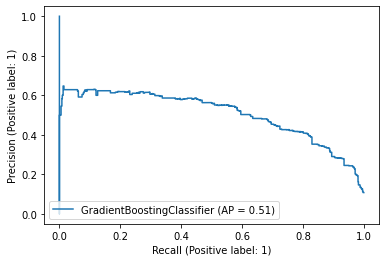

In [37]:
#Plotting Precision-Recall Curve
disp = plot_precision_recall_curve(model, X_test_scaled, y_test)

In [22]:
# # Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    first_units = hp.Int('first_units', min_value=1, max_value=10, step=2)
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=first_units, activation=activation, input_dim=len(X_train_scaled[0])))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        next_units = hp.Int('units_' + str(i), min_value=1, max_value=10, step=2)

        nn_model.add(tf.keras.layers.Dense(units=next_units, activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["Accuracy"])

    return nn_model

In [23]:
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model, # function name
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

INFO:tensorflow:Reloading Oracle from existing project .\untitled_project\oracle.json
INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json


In [24]:
# Run the kerastuner search for best hyperparameters
tuner.search(X_resampled_s, y_resampled_s,epochs=20,validation_data=(X_test_scaled,y_test))

INFO:tensorflow:Oracle triggered exit


In [25]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'relu',
 'first_units': 9,
 'num_layers': 4,
 'units_0': 5,
 'units_1': 9,
 'units_2': 9,
 'units_3': 1,
 'units_4': 3,
 'units_5': 1,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 7,
 'tuner/bracket': 2,
 'tuner/round': 2,
 'tuner/trial_id': '0042'}

In [26]:
best_model = tuner.get_best_models(1)[0]
fit_model = best_model.fit(X_resampled_s, y_resampled_s, epochs=20)

Epoch 1/20
1268/1268 [==============================] - 4s 2ms/step - loss: 0.6932 - Accuracy: 0.4994
Epoch 2/20
1268/1268 [==============================] - 3s 2ms/step - loss: 0.6932 - Accuracy: 0.4981
Epoch 3/20
1268/1268 [==============================] - 3s 2ms/step - loss: 0.6932 - Accuracy: 0.4980
Epoch 4/20
1268/1268 [==============================] - 3s 2ms/step - loss: 0.6932 - Accuracy: 0.5004
Epoch 5/20
1268/1268 [==============================] - 3s 2ms/step - loss: 0.6932 - Accuracy: 0.4978
Epoch 6/20
1268/1268 [==============================] - 3s 2ms/step - loss: 0.6932 - Accuracy: 0.5018
Epoch 7/20
1268/1268 [==============================] - 3s 2ms/step - loss: 0.6932 - Accuracy: 0.5015
Epoch 8/20
1268/1268 [==============================] - 3s 2ms/step - loss: 0.6932 - Accuracy: 0.4977
Epoch 9/20
1268/1268 [==============================] - 3s 2ms/step - loss: 0.6932 - Accuracy: 0.4969
Epoch 10/20
1268/1268 [==============================] - 3s 2ms/step - loss: 0.693

In [27]:
# Evaluate best model against full test data
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

235/235 - 1s - loss: 0.6923 - Accuracy: 0.9013 - 564ms/epoch - 2ms/step
Loss: 0.6923424601554871, Accuracy: 0.9013333320617676


C:\Users\safaa\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':


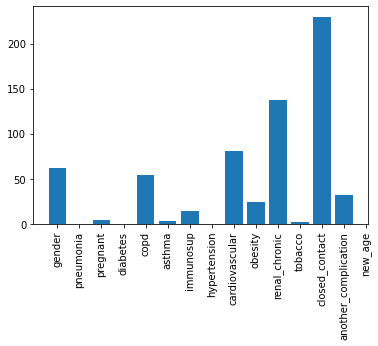

In [30]:
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2, f_classif

# Perform feature selection
selector = SelectKBest(f_classif, k=10)
selector.fit(X, y)

# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)

# Plot the scores.
plt.bar(range(len(keep_col)), scores)
plt.xticks(range(len(keep_col)), X, rotation='vertical')
plt.show()